In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#load data frame
df = pd.read_csv('profiles.csv')


In [3]:
#exploring data

#list(df)
#df.head()
#df.age.value_counts()
#df.corr()

In [4]:
#sorry old people
df = df.drop(df[(df.age > 70)].index)

In [5]:
#finds which features have nans
#df.isna().any()
features_to_remove = ['body_type','diet','drugs','education','income','ethnicity','height', 'orientation', 'status', 'location','sex','sign','pets','religion','smokes','drinks','speaks', 'last_online']
df.drop(labels=features_to_remove, axis=1, inplace=True)


In [6]:
#replaces nans with 0
df.fillna({'age': 0,
          'offspring': 0,
           'job':0,
           'essay0': 0,
           'essay1': 0,
          'essay2': 0,
          'essay3': 0,
          'essay4': 0,
          'essay5': 0,
          'essay6': 0,
          'essay7': 0,
          'essay8': 0,
          'essay9': 0
          },
          inplace=True)

In [7]:
# check to make sure there's no more nans
#df.isna().any()


age          False
essay0       False
essay1       False
essay2       False
essay3       False
essay4       False
essay5       False
essay6       False
essay7       False
essay8       False
essay9       False
job          False
offspring    False
dtype: bool

In [8]:
#len(df)

59944

In [9]:
import re
all_essays = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
texting_char = [':)', ':-)', ':(', ':-(', ';)', ';-)', ':p', ':P', ':-P', ':-p', ':0', ':D' '<3', '@', '#', '$']
older_words = ['child', 'children', 'kid' 'kids', 'boy', 'boys', 'son', 'sons', 'girl', 'girls', 'daughter', 'daughters', 'parent', 'uncle', 'aunty', 'divorced', 'divorce']
#Function matches lists above with text in essay
def add_one(text, lst):
    num_matches = 0
    for i in text:
        if i in lst:
            num_matches += 1
        
    return num_matches


#strip all alphabetial and HTML Tags
#create new column with total amount of texting characters or older people words used in essay for each profile
texting_col = 'total_texting_char'
older_col = 'total_older_words'
texting_pattern = r'[\n\w+]|<.+?>'
only_alpha = r'[.,;?!]|<.+?>'
def match_pattern(essays, match_list, new_column, pattern):
    new_df = df.copy(deep = True)
    for essay in essays:
        new_df[essay] = new_df[essay].apply(lambda x: re.sub(pattern, '', str(x)))
        new_df[essay] = new_df[essay].apply(lambda x: x.split(' '))
        new_df[essay] = new_df[essay].apply(lambda x: add_one(x, match_list))  
    new_df[str(new_column)] = new_df[essays].sum(axis = 1)
    features_to_remove = ['age', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'offspring', 'job']
    new_df.drop(labels=features_to_remove, axis=1, inplace=True)
    return new_df

total_texting = match_pattern(all_essays, texting_char, texting_col, texting_pattern)

total_older = match_pattern(all_essays, older_words, older_col, only_alpha)



In [10]:
#join texting/older columns to orginal df
re_col = total_texting.join(total_older, lsuffix='total_texting_num', rsuffix='total_older_words')
df = df.join(re_col)

In [11]:
#drop rows with 0 in texting/older columns

df = df.drop(df[(df.total_older_words == 0) & (df.total_texting_char == 0)].index)
df.dropna(axis = 0, inplace = True) 

In [12]:
df.corr()

,age,total_texting_char,total_older_words
age,1.000000,-0.074117,0.107735
total_texting_char,-0.074117,1.000000,-0.243604
total_older_words,0.107735,-0.243604,1.000000


In [13]:
#map categorical data interested in

offspring_map = {0:0,
                'doesn&rsquo;t have kids': 1,
                'doesn&rsquo;t have kids, but might want them': 2,
                'doesn&rsquo;t have kids, but wants them': 3,
                'doesn&rsquo;t want kids': 4,
                'has kids': 5,
                'has a kid': 6,
                'doesn&rsquo;t have kids, and doesn&rsquo;t want any': 7,
                'has kids, but doesn&rsquo;t want more': 8,
                'has a kid, but doesn&rsquo;t want more': 9,
                'has a kid, and might want more': 10,
                'wants kids': 11,
                'might want kids': 12,
                'has kids, and might want more': 13,
                'has a kid, and wants more': 14,
                'has kids, and wants more': 15}

job_map = { 0:0,
           'other': 1,
           'student': 2,
           'science / tech / engineering': 3,
           'computer / hardware / software': 4,
           'artistic / musical / writer': 5,
           'sales / marketing / biz dev': 6,
           'medicine / health': 7,
           'education / academia': 8,
           'executive / management': 9,
           'banking / financial / real estate': 10,
           'entertainment / media': 11,
           'law / legal services': 12,
           'hospitality / travel': 13,
           'construction / craftsmanship': 14,
          'clerical / administrative': 15, 
          'political / government': 16,
          'rather not say': 17,
          'transportation': 18,
          'unemployed': 19,
          'retired': 20,
          'military': 21}

df['job_code'] = df.job.map(job_map)
df['offspring_code'] = df.offspring.map(offspring_map)

In [14]:
len(df)

26445

In [15]:
#df.head()

,age,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,job,offspring,total_texting_char,total_older_words,job_code,offspring_code
1,35,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,0,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,0,0,i am very open and will share just about anyth...,0,hospitality / travel,"doesn&rsquo;t have kids, but might want them",3,0,13,2
9,37,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,i like some tv. i love summer heights high and...,"music, my guitar<br />\ncontrast<br />\ngood f...",<strong><em>you should</em></strong>,<strong><em>send a message</em></strong>,<em><strong>and say hi.</strong></em>,you can rock the bells,student,0,0,1,2,0
10,35,"update: i'm seeing someone, so off the market ...",i have three jobs. i've been doing sound and l...,"hugging, kissing, laughing, motivating people,...",my huge goofy smile,"i'm constantly reading, i read at what my frie...",family<br />\nfriends<br />\nfood<br />\nwomen...,"snowboarding, food, women, goofy nerd stuff, a...",having dinner and drinks with friends and/or w...,i used to wish for a jetpack when blowing out ...,you are a complex woman with healthy self-este...,0,0,1,3,0,0
11,28,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",books = yes. avid reader.<br />\nmoves = etern...,"guitar - even if i don't play it all the time,...",a little bit of everything. but mostly social ...,hanging out with a small group of friends--sta...,i'm picky when it comes to dating. i know what...,"if you know who you are, who you want, where y...",banking / financial / real estate,0,3,0,10,0
15,39,0,"dancing, playing, exploring, smiling, and doin...","obscure dances from the '30's and '40's, laugh...",you tell me:),i don't really pick favorites. variety is the ...,i work with children with disabilities for a l...,"how to live a joyful, playful life.",i'm usually pretty exhausted by friday. so usu...,"i hated cleaning the litter box so much, i tau...",0,medicine / health,doesn&rsquo;t have kids,1,2,7,1


In [16]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#find k value with best R2 score
def knn_model(feature_list):
    scores = []
    labels = df.loc[:,'age']
    features = df.loc[:,feature_list]
    train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 1)
    
    for k in range(1, 50):
        regressor = KNeighborsRegressor(n_neighbors = k)
        regressor.fit(train_data, train_labels)
        scores.append(regressor.score(test_data, test_labels))
    k_values = range(1,50)
    k_score = list(zip(k_values, scores))
    best_score = sorted(k_score, key=lambda tup: tup[1], reverse = True)
    print('Best Score:', best_score[0])
        
    plt.plot(range(1,50), scores)
    plt.xlabel('K-values')
    plt.ylabel('Regressor Score')
    plt.show()

    

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#predict age with best k
def knn_predict(feature_list, k):
    scores = []
    labels = df.loc[:,'age']
    features = df.loc[:,feature_list]
    train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 1)
    regressor = KNeighborsRegressor(n_neighbors = k)
    regressor.fit(train_data, train_labels)
    scores.append(regressor.score(test_data, test_labels))
    
    # calculate predicted age using test_data
    predict_age = regressor.predict(test_data)
    print('Mean Squared Erorr:', mean_squared_error(test_labels, predict_age))
    print('R2 Score:', r2_score(test_labels, predict_age))

    plt.scatter(test_labels, predict_age, alpha = .1)
    plt.xlabel('Age')
    plt.ylabel('Predicted Age')
    plt.ylim(18,70)
    plt.show()

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def linear_model(feature_list):
    labels = df.loc[:,'age']
    features = df.loc[:,feature_list]
    
    train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 1)
    
    if len(train_data.shape) < 2:
        train_data = np.array(train_data).reshape(-1,1)
        test_data = np.array(test_data).reshape(-1,1)
    
    model = LinearRegression()
    model.fit(train_data, train_labels)
    
    # print the train and test scores
    print('Train Score:', model.score(train_data, train_labels))
    print('Test Score:', model.score(test_data, test_labels))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print('Features Coefficients (most to least predictive):', sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # calculate predicted age using test_data
    predict_age = model.predict(test_data)
    
    print('Mean Squared Erorr:', mean_squared_error(test_labels, predict_age))
    
    print('R2 Score:', r2_score(test_labels, predict_age))
    
    plt.scatter(test_labels, predict_age, alpha = .1)
    plt.xlabel('Age')
    plt.ylabel('Predicted Age')
    plt.ylim(18,70)
    plt.show()

Train Score: 0.1242904862429125
Test Score: 0.11747622288448178
Features Coefficients (most to least predictive): [('offspring_code', 1.118245830616006), ('total_older_words', 0.32645934541977517), ('total_texting_char', -0.2936655289636713), ('job_code', 0.23975351360954078)]
Mean Squared Erorr: 78.20196092779348
R2 Score: 0.11747622288448178


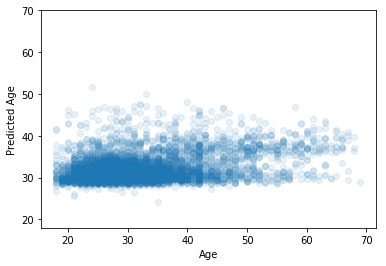

In [19]:
features = ['total_older_words', 'total_texting_char', 'offspring_code', 'job_code']


linear_model(features)


Best Score: (40, 0.2751987925487379)


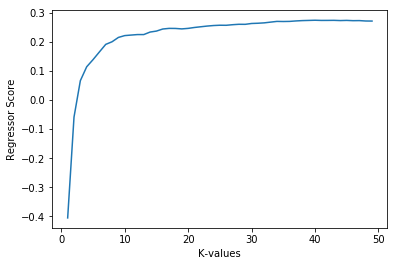

In [20]:
knn_model(features)

Mean Squared Erorr: 64.22589076384949
R2 Score: 0.2751987925487379


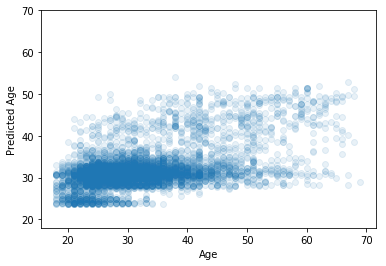

In [21]:
knn_predict(features, 40)